In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import KMeans
import sys

In [2]:
def get_data_python2():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        #u = pickle._Unpickler(fd)
        #u.encoding = 'latin1'
        train_set, valid_set, test_set = pickle.load(fd)
        #u.load()
        return train_set, valid_set, test_set

In [3]:
def get_data_python3():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        u = pickle._Unpickler(fd)
        u.encoding = 'latin1'
        train_set, valid_set, test_set = u.load()
        return train_set, valid_set, test_set

In [4]:
if(sys.version[0]=='3'):
    train_set, valid_set, test_set = get_data_python3()
elif(sys.version[0]=='2'):
    train_set, valid_set, test_set = get_data_python2()

In [5]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [6]:
print("Size of training set:", len(train_set[0]))

Size of training set: 60000


In [7]:
print("Size of each training set item (28x28 image 1-d array): ", len(train_set[0][0]))

Size of each training set item (28x28 image 1-d array):  784


In [8]:
#Reshaping each 784 1-d array into 28x28 2-d array
train_set[0].reshape(60000,28,28).shape

(60000, 28, 28)

In [9]:
#Creating 4x4 grid of 10x10 patches
def patch_creation(image):
    patches = []
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patch = image[i:i+10,j:j+10].reshape(-1,100)
            patches.append(patch)
    return(patches)

In [10]:
def plot_image(test): 
    fig = plt.figure(figsize=(4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                            test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                            test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                            test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='Greys_r')

    plt.show()

In [11]:
#this function is simply here to make sure that our grid creation works correctly
def test_image():
    #fetch one image
    image = train_set[0][1].reshape(28,28)
    
    print("Image shape: ",image.shape)
    
    #create 16 - 10x10 patches
    test = patch_creation(image)
    
    print("Num patches: ", len(test))
    
    #plotting the test image to see create patches
    plot_image(test)
    
    #plt.imshow(image.reshape(28, 28), cmap='Greys_r')
    

Image shape:  (28, 28)
Num patches:  16


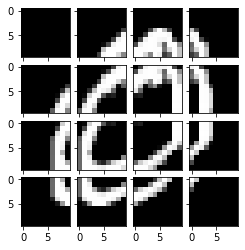

In [12]:
test_image()

In [13]:
#reshaping each 784 1-d array into 28x28 2-d array and creating patches for each image
training_patches=[]
for i in range(60000):
    image = train_set[0][i].reshape(28,28)
    training_patches.append(patch_creation(image))

In [14]:
print("Amount of training images: ", len(training_patches))

Amount of training images:  60000


In [15]:
print("Amount of matrices (patches) in each training image: ", len(training_patches[0]))

Amount of matrices (patches) in each training image:  16


In [16]:
#Choosing 1 patch from the 16 previously created for each image at random and appending to 
#training list
train_cluster=[]
for i in range(60000):
    n = random.randint(0, 15)
    train_cluster.append(training_patches[i][n])

In [17]:
#creates a list of 6000 numbers where each is between 0 - 59999
indices = random.sample(range(60000), 6000)

In [18]:
#appending randomly sampled patches using the previously created list of indices
train_cluster_sample=[]
for ind in indices:
    train_cluster_sample.append(train_cluster[ind])

In [19]:
print("Length of our randomly sampled patches: ", len(train_cluster_sample))

Length of our randomly sampled patches:  6000


In [20]:
#creating a 6000x100 matrix of zeros that where each row will be one of our samples
training_matrix = np.zeros((6000,100))
for i in range(6000):
    #making eacch row a random patch
    training_matrix[i,:] = train_cluster_sample[i][0]

In [21]:
# create kmeans object
kmeans = KMeans(n_clusters=50)
# fit kmeans object to data
kmeans.fit(training_matrix)
# save new clusters for chart
y_km = kmeans.predict(training_matrix)

In [22]:
training_matrix_60k = np.zeros((60000,100))
for i in range(60000):
    training_matrix_60k[i,:] = train_cluster[i][0]

In [23]:
y_km_60k = kmeans.predict(training_matrix_60k)

In [24]:
#cluster_dict=[]
cluster_dict = {}
for i in range(50):
    key = str(i)
    subtrain_matrix = training_matrix_60k[y_km_60k==i,:]
    kmeans_sub = KMeans(n_clusters=50)
    kmeans_sub.fit(subtrain_matrix)
    cluster_dict[key] = kmeans_sub 
    y_km_sub = kmeans_sub.predict(subtrain_matrix)
    #cluster_dict.append(y_km_sub)

In [25]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [26]:
def patch_b(image):
    patches16 = []
    x_ = [0, 1, 2]
    y_ = [0, 1, 2]
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patches9 = []
            for k in x_:
                for l in y_:
                    patch = image[i+k:i+k+10, j+l:j+l+10].reshape(-1,100)
                    patches9.append(patch)
            patches16.append(patches9)
    return patches16

In [27]:
testing_patches = []
for i in range(10000):
    testing_reshaped = test_set[0][i].reshape(28,28)
    testing_padded = np.pad(testing_reshaped, 1, pad_with)
    testing_patched = patch_b(testing_padded)
    testing_patches.append(testing_patched)

In [28]:
print("Shape of padded image: ", testing_padded.shape)
print("Number of original patches: ", len(testing_patched))
print("Number of recentered patches per original patch: ", len(testing_patched[0]))
print("Total number of patches for each image: ", len(testing_patched) * len(testing_patched[0]))

Shape of padded image:  (30, 30)
Number of original patches:  16
Number of recentered patches per original patch:  9
Total number of patches for each image:  144


In [29]:
training_patches = []
random_indices = random.sample(range(60000), 6000)
for i in random_indices:
    training_reshaped = train_set[0][i].reshape(28,28)
    training_padded = np.pad(training_reshaped, 1, pad_with)
    training_patched = patch_b(training_padded)
    training_patches.append(training_patched)

In [30]:
print("Shape of padded image: ", training_padded.shape)
print("Number of original patches: ", len(training_patched))
print("Number of recentered patches per original patch: ", len(training_patched[0]))
print("Total number of patches for each image: ", len(training_patched) * len(training_patched[0]))

Shape of padded image:  (30, 30)
Number of original patches:  16
Number of recentered patches per original patch:  9
Total number of patches for each image:  144


In [31]:
def finding_cluster(data,num_images=10000,num_grids=16,num_patches=9):
    data_matrix_long = np.zeros((num_images*num_grids*num_patches,100))
    z=0
    for i in range(num_images):
        for j in range(num_grids):
            for k in range(num_patches):
                data_matrix_long[z,:] = data[i][j][k]
                z=z+1
    #Finding the main 50 clusters
    data_km_long = kmeans.predict(data_matrix_long)
    data_50clusters= np.zeros((num_images,num_grids,num_patches))
    z=0
    for i in range(num_images):
        for j in range(num_grids):
            for k in range(num_patches):
                data_50clusters[i,j,k] = data_km_long[z]
                z=z+1
    data_2500clusters= [[['000_000' for i in range(num_patches)] for j in range(num_grids)] for k in range(num_images)]
    subcluster_data_fit = np.zeros((1,100))
    z=1
    #Finding the subclusters of each patch
    for i in range(num_images):
        for j in range(num_grids):
            for k in range(num_patches):
                cluster = data_50clusters[i,j,k]
                subcluster_data_fit[0,:] = data[i][j][k]
                fitted_centre=cluster_dict[str(int(cluster))].predict(subcluster_data_fit)
                text=str(int(cluster))+'_'+str(fitted_centre[0])
                data_2500clusters[i][j][k]= text
                if z%10000==0 and z>=10000:
                    print(str(z*100/(num_images*num_grids*num_patches))+'% done')
                z=z+1
    return(data_2500clusters)

In [32]:
test_2500clusters = finding_cluster(testing_patches,10000,16,9)

0.6944444444444444% done
1.3888888888888888% done
2.0833333333333335% done
2.7777777777777777% done
3.4722222222222223% done
4.166666666666667% done
4.861111111111111% done
5.555555555555555% done
6.25% done
6.944444444444445% done
7.638888888888889% done
8.333333333333334% done
9.027777777777779% done
9.722222222222221% done
10.416666666666666% done
11.11111111111111% done
11.805555555555555% done
12.5% done
13.194444444444445% done
13.88888888888889% done
14.583333333333334% done
15.277777777777779% done
15.972222222222221% done
16.666666666666668% done
17.36111111111111% done
18.055555555555557% done
18.75% done
19.444444444444443% done
20.13888888888889% done
20.833333333333332% done
21.52777777777778% done
22.22222222222222% done
22.916666666666668% done
23.61111111111111% done
24.305555555555557% done
25.0% done
25.694444444444443% done
26.38888888888889% done
27.083333333333332% done
27.77777777777778% done
28.47222222222222% done
29.166666666666668% done
29.86111111111111% done

In [33]:
np.unique(test_2500clusters)

array(['0_0', '0_1', '0_10', ..., '9_7', '9_8', '9_9'], dtype='<U5')

In [34]:
def histogram_patch_creation(data,num_images=10000,num_grids=16,num_patches=9):
    colnames=['image_num']
    for i in range(50):
        for j in range(50):
            colnames.append(str(i)+'_'+str(j))
    df=np.zeros((num_images,2501))
    hist_patches = pd.DataFrame(df,columns = colnames)
    hist_patches['image_num']=range(num_images)
    z=1
    for i in range(num_images):
        for j in range(16):
            for k in range(9):
                hist_patches.loc[i,data[i][j][k]]+=1
                if z%10000==0 and z>=10000:
                    print(str(z*100/(num_images*num_grids*num_patches))+'% done')
                z=z+1
    return(hist_patches)

In [35]:
test_hist_patches=histogram_patch_creation(test_2500clusters,10000,16,9)

0.6944444444444444% done
1.3888888888888888% done
2.0833333333333335% done
2.7777777777777777% done
3.4722222222222223% done
4.166666666666667% done
4.861111111111111% done
5.555555555555555% done
6.25% done
6.944444444444445% done
7.638888888888889% done
8.333333333333334% done
9.027777777777779% done
9.722222222222221% done
10.416666666666666% done
11.11111111111111% done
11.805555555555555% done
12.5% done
13.194444444444445% done
13.88888888888889% done
14.583333333333334% done
15.277777777777779% done
15.972222222222221% done
16.666666666666668% done
17.36111111111111% done
18.055555555555557% done
18.75% done
19.444444444444443% done
20.13888888888889% done
20.833333333333332% done
21.52777777777778% done
22.22222222222222% done
22.916666666666668% done
23.61111111111111% done
24.305555555555557% done
25.0% done
25.694444444444443% done
26.38888888888889% done
27.083333333333332% done
27.77777777777778% done
28.47222222222222% done
29.166666666666668% done
29.86111111111111% done

In [36]:
train_2500clusters = finding_cluster(training_patches, 6000, 16, 9)

1.1574074074074074% done
2.314814814814815% done
3.4722222222222223% done
4.62962962962963% done
5.787037037037037% done
6.944444444444445% done
8.101851851851851% done
9.25925925925926% done
10.416666666666666% done
11.574074074074074% done
12.731481481481481% done
13.88888888888889% done
15.046296296296296% done
16.203703703703702% done
17.36111111111111% done
18.51851851851852% done
19.675925925925927% done
20.833333333333332% done
21.99074074074074% done
23.14814814814815% done
24.305555555555557% done
25.462962962962962% done
26.62037037037037% done
27.77777777777778% done
28.935185185185187% done
30.09259259259259% done
31.25% done
32.407407407407405% done
33.56481481481482% done
34.72222222222222% done
35.879629629629626% done
37.03703703703704% done
38.19444444444444% done
39.351851851851855% done
40.50925925925926% done
41.666666666666664% done
42.824074074074076% done
43.98148148148148% done
45.138888888888886% done
46.2962962962963% done
47.4537037037037% done
48.61111111111

In [37]:
train_hist_patches=histogram_patch_creation(train_2500clusters,6000,16,9)

1.1574074074074074% done
2.314814814814815% done
3.4722222222222223% done
4.62962962962963% done
5.787037037037037% done
6.944444444444445% done
8.101851851851851% done
9.25925925925926% done
10.416666666666666% done
11.574074074074074% done
12.731481481481481% done
13.88888888888889% done
15.046296296296296% done
16.203703703703702% done
17.36111111111111% done
18.51851851851852% done
19.675925925925927% done
20.833333333333332% done
21.99074074074074% done
23.14814814814815% done
24.305555555555557% done
25.462962962962962% done
26.62037037037037% done
27.77777777777778% done
28.935185185185187% done
30.09259259259259% done
31.25% done
32.407407407407405% done
33.56481481481482% done
34.72222222222222% done
35.879629629629626% done
37.03703703703704% done
38.19444444444444% done
39.351851851851855% done
40.50925925925926% done
41.666666666666664% done
42.824074074074076% done
43.98148148148148% done
45.138888888888886% done
46.2962962962963% done
47.4537037037037% done
48.61111111111

In [38]:
test_hist_patches

,image_num,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,...,49_40,49_41,49_42,49_43,49_44,49_45,49_46,49_47,49_48,49_49
0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print(len(train_2500clusters))

6000


In [40]:
print(len(test_2500clusters))

10000


In [ ]:
print(len(t))